# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
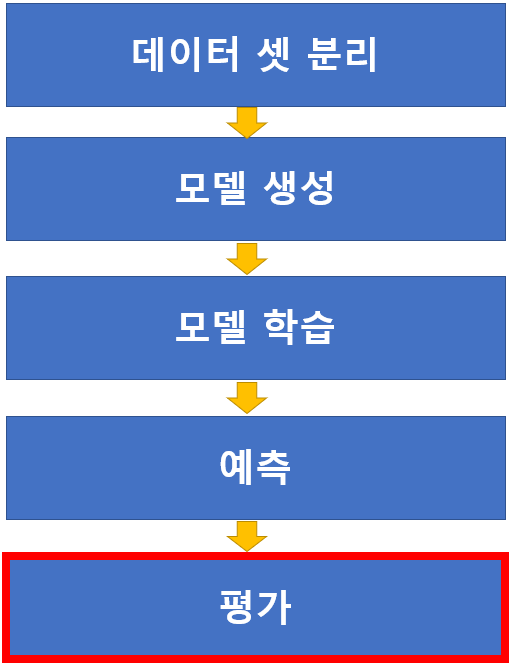

# 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP score
1. ROC, AUC score

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

## 다중 분류(Multi class classification)
- Target이 여러개의 클래스(범주값)으로 구성된 분류문제
    - 여러개의 클래스중 하나를 분류한다.
    
##  이진 분류(Binary classification)
- 어떤 항목인지 아닌지를 분류한다.
    - 환자인가?
    - 스팸메일인가? 
    - 사기 거래 인가?
- 이진 분류 양성(Positive)과 음성(Negative)
    - **양성(Positive):** 찾으려는 대상. 보통 1로 표현한다.
    - **음성(Negative):** 찾으려는 대상이 아닌 것. 보통 0로 표현한다.
- 예
    - 환자인가?
        - 양성(Positive): 환자, 1
        - 음성(Negative): 환자 아님(정상), 0
    - 스팸메일인가? 
         - 양성(Positive): 스팸메일, 1
         - 음성(Negative): 스팸메일 아님(정상 메일), 0
    - 사기 거래 인가?
         - 양성(Positive): 사기 거래, 1
         - 음성(Negative): 사기 거래 아님(정상 거래), 0
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 이진 분류에서 **양성(Positive)에 대한 지표만 확인 할 수 없다.** 
    - 전체 중 몇 개가 맞았는지에 대한 평가 지표이므로 양성(Positive)만의 성능 또는 음성(Negative)만의 성능을 알 수 없다.
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((1797, 64), (1797,))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


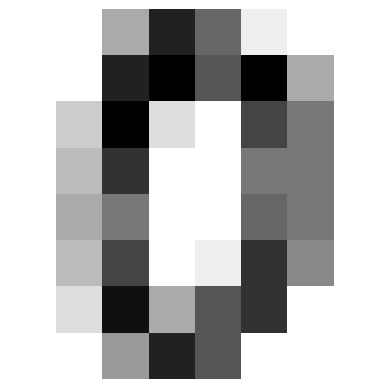

In [4]:
# 데이터 시각화
# 8x8 -> 64x1, 4bit, 0~16으로 표현된 이미지 데이터
print(X[0].reshape(8,8))
plt.imshow(X[0].reshape(8,8), cmap='binary')
plt.axis('off')
plt.show()

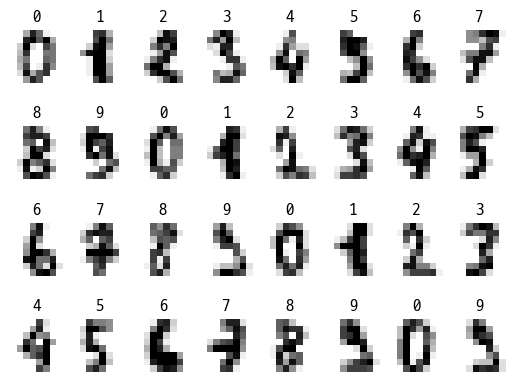

In [5]:
# X의 데이터를 일부 시각화
for i in range(32):
    plt.subplot(4, 8, i+1)
    plt.imshow(X[i].reshape(8, 8), cmap='binary')
    plt.title(y[i])
    plt.axis('off')

In [6]:
y[:5]
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

### 불균형 데이터셋으로 만들기
이미지를 0 ~ 9 로 분류하는 문제를 위한 데이터셋 ===> 9와 나머지 숫자로 분류하는 데이터셋으로 변환 => 이 숫자가 9야?
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [7]:
# 불균형 데이터 9/ 그외
# 9를 찾는 이진분류 문제로 변환
y_nine = (y==9).astype(np.int8)
np.unique(y_nine, return_counts=True)

(array([0, 1], dtype=int8), array([1617,  180], dtype=int64))

In [8]:
y_nine = np.where(y==9, 1, 0) # 도 가능
np.unique(y_nine, return_counts=True)

(array([0, 1]), array([1617,  180], dtype=int64))

In [9]:
1617/1797,  180/1797 # 불균형 데이터

(0.8998330550918197, 0.1001669449081803)

### 데이터셋 분할
- train/test 로 분할

In [10]:
# 불균형 데이터의 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_tmp, X_test, y_tmp, y_test = train_test_split(X,
                                                y_nine,
                                                test_size=0.25,
                                                random_state=1473042201,
                                                stratify=y_nine,
                                                )

In [11]:
X_tmp.shape, X_test.shape, y_tmp.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [12]:
# 비율 확인
np.unique(y_tmp, return_counts=True)[1] / y_tmp.size

array([0.89977728, 0.10022272])

In [13]:
np.unique(y_test, return_counts=True)[1] / y_test.size

array([0.9, 0.1])

### 모델 생성 및 학습

#### Dummy Model 정의
- dummy model: 진짜 모델이 아니라 모델을 흉내낸 모델을 말한다.
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [14]:
# Dummy 모델 생성
from sklearn.dummy import DummyClassifier
# 더미 모델 생성
# strategy : 더미 모델의 예측값을 결정하는 방법
# most_frequent : 가장 많은 레이블로 예측 (정답의 최빈값을 추측)
dummy = DummyClassifier(strategy='most_frequent')
# 더미 모델 훈련
dummy.fit(X_tmp, y_tmp)

DummyClassifier(strategy='most_frequent')

In [15]:
# 테스트 데이터에 대한 예측
pred_tmp = dummy.predict(X_tmp)     # y_tmp의 최빈값으로 예측(0)
pred_test = dummy.predict(X_test)

In [16]:
np.unique(pred_tmp), np.unique(pred_test)

(array([0]), array([0]))

In [17]:
# accuracy_score : 정확도
from sklearn.metrics import accuracy_score
accuracy_score(y_tmp, pred_tmp), accuracy_score(y_test, pred_test)
# 전부 0으로 예측해도 정확도가 높게 나옴

(0.8997772828507795, 0.9)

아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값(정답)과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

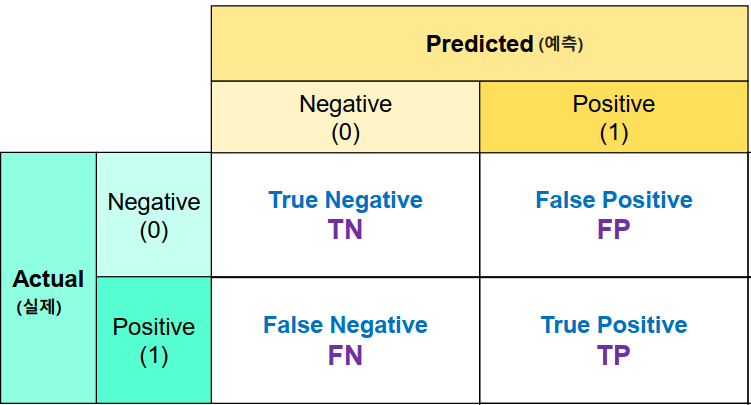

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
    - Accuracy(정확도)는 이진분류 뿐아니라 모든 분류의 기본 평가방식이다.
    
### 양성(Positive) 예측력 측정 평가지표

- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPR) = \cfrac{FP}{TN+FP}$

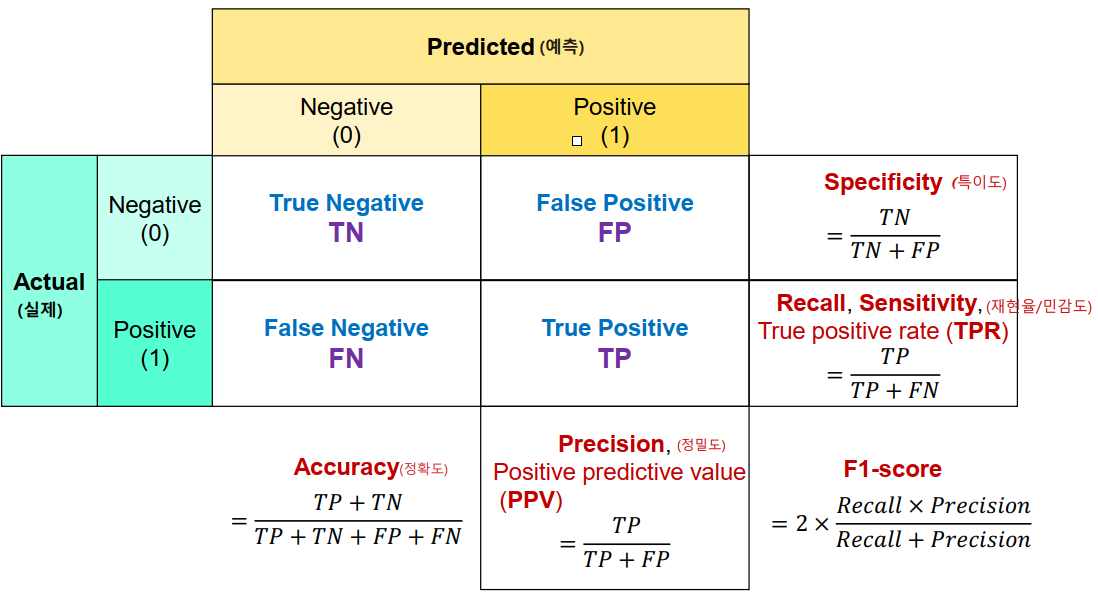

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값),  ConfusionMatrixDisplay(Confusion marix 시각화클래스)**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [18]:
# Dymmy 모델의 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tmp, pred_tmp)
# 시각화
pd.DataFrame(confusion_matrix(y_tmp, pred_tmp),
            index=['Negative', 'Positive'],
            columns=['Negative', 'Positive'],
            )

,Negative,Positive
Negative,1212,0
Positive,135,0


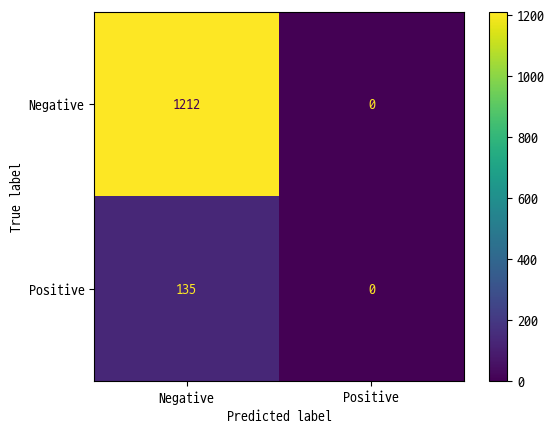

In [19]:
# ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_tmp, pred_tmp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Negative', 'Positive'])
disp.plot()

In [20]:
def confusion_matrix_viz_to_seaborn(y_true, y_pred, cmap = 'Reds'):
    import seaborn as sns
    import matplotlib.pyplot as plt
    # 혼동행렬 생성
    tags= ['TN', 'FP', 'FN', 'TP']
    counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_true, y_pred).flatten()]
    percentages = ['{0:.2%}'.format(value) for value in
                    confusion_matrix(y_true, y_pred).flatten()/np.sum(confusion_matrix(y_true, y_pred))]
    labels = [f'{t}\n{c}\n{p}' for t, c, p in zip(tags, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=labels,
                cmap=cmap,
                fmt='',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    # 정밀도, 재현율, F1 Score, Accuracy -> 위치에 텍스트로 표시
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
    plt.title(f'Accuracy: {accuracy_score(y_true, y_pred):.2%}\n'
                f'Precision: {precision_score(y_true, y_pred):.2%}\n'
                f'Recall: {recall_score(y_true, y_pred):.2%}\n'
                f'F1: {f1_score(y_true, y_pred):.2%}')
    
    plt.show()

In [21]:
def cm_viz(y_true, y_pred, cmap = 'Reds', color = 'r', figsize=(8, 8)):
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=figsize)
    axs = fig.subplots(2, 2)
    cm_ax, recall_ax = axs[0]
    acc_prec_ax, f1_ax = axs[1]
    # 혼동행렬 생성
    tags= ['TN', 'FP', 'FN', 'TP']
    counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix(y_true, y_pred).flatten()]
    labels = [f'{t}\n{c}' for t, c in zip(tags, counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=labels,
                cmap=cmap,
                fmt='',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                ax=cm_ax,
                )
    cm_ax.set_xlabel('Predicted Label')
    cm_ax.set_ylabel('True Label')
    
    # precision, accuracy ax에 바차트로 표시
    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    acc_prec_ax.bar(['Accuracy', 'Precision'], [acc*100, prec*100], color=color)
    acc_prec_ax.set_ylim(0, 100)
    acc_prec_ax.set_title('Accuracy & Precision')
    acc_prec_ax.set_ylabel('Score')
    # precision accuracy 퍼센트로 표시
    acc_prec_ax.text(0, acc*100, f'{acc*100:.2f}%', ha='center', va='bottom')
    acc_prec_ax.text(1, prec*100, f'{prec*100:.2f}%', ha='center', va='bottom')
    
    # recall ax에 가로 바차트로 spec, recall 표시
    rc = recall_score(y_true, y_pred)
    spec = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    recall_ax.barh(['Recall', 'Specificity'], [rc*100, spec*100], color=color)
    recall_ax.set_xlim(0, 100)
    recall_ax.set_title('Specificity & Recall')
    # recall 퍼센트로 표시
    recall_ax.text(rc*100, 0, f'{rc*100:.2f}%', ha='left', va='center')
    recall_ax.text(spec*100, 1, f'{spec*100:.2f}%', ha='left', va='center')
    
    # f1 ax에 바차트로 표시
    f1 = f1_score(y_true, y_pred)
    f1_ax.bar(['F1'], [f1 * 100], color=color)
    f1_ax.set_ylim(0, 100)
    f1_ax.set_title('F1')
    f1_ax.set_ylabel('Score')
    # f1 퍼센트로 표시
    f1_ax.text(0, f1*100, f'{f1*100:.2f}%', ha='center', va='bottom')
    
    plt.show()

c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


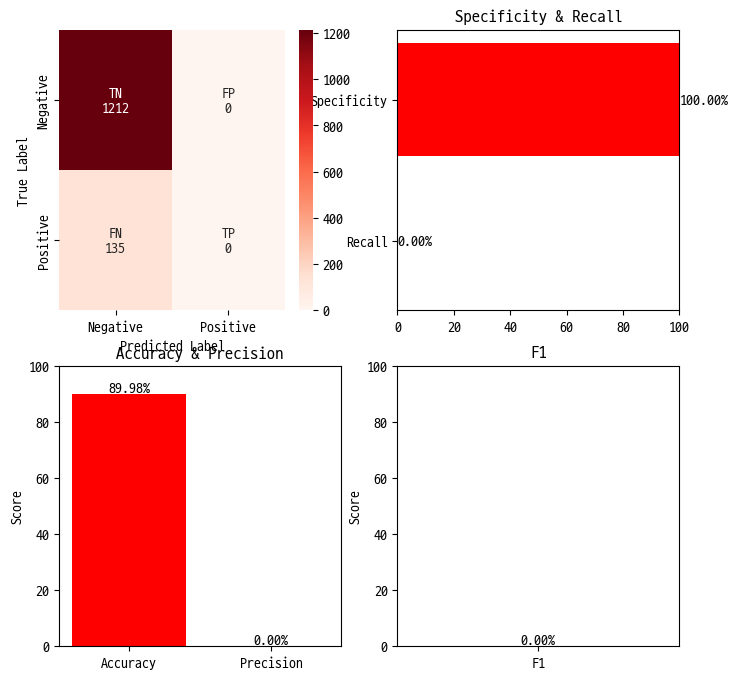

In [22]:
cm_viz(y_tmp, pred_tmp)

c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


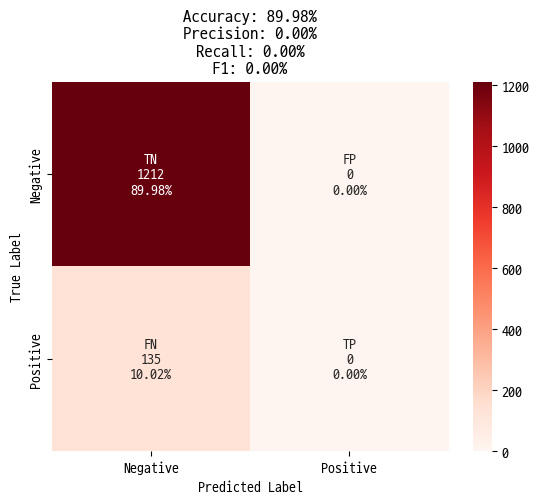

In [23]:
# seaborn의 heatmap을 이용한 시각화
confusion_matrix_viz_to_seaborn(y_tmp, pred_tmp)

c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


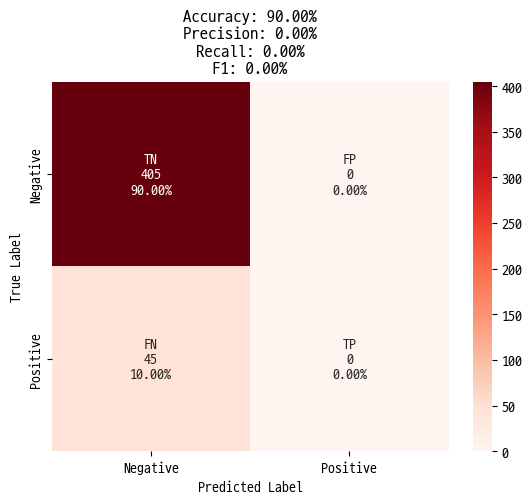

In [24]:
confusion_matrix_viz_to_seaborn(y_test, pred_test)

In [25]:
from sklearn.metrics import (precision_score, recall_score,
                            f1_score, accuracy_score,
                            precision_recall_fscore_support,
                            confusion_matrix,
                            ConfusionMatrixDisplay,
                            )

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [26]:
# 정확도, 정밀도, 재현율, F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
# 정확도
accuracy_score(y_tmp, pred_tmp), accuracy_score(y_test, pred_test)


(0.8997772828507795, 0.9)

In [27]:
# 정밀도
precision_score(y_tmp, pred_tmp), precision_score(y_test, pred_test)

c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [28]:
# 재현율
recall_score(y_tmp, pred_tmp), recall_score(y_test, pred_test)

(0.0, 0.0)

In [29]:
# F1-score
f1_score(y_tmp, pred_tmp), f1_score(y_test, pred_test)

(0.0, 0.0)

In [30]:
# classification_report : 정밀도, 재현율, F1-score를 한번에 출력
from sklearn.metrics import classification_report
print(classification_report(y_tmp, pred_tmp))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1212
           1       0.00      0.00      0.00       135

    accuracy                           0.90      1347
   macro avg       0.45      0.50      0.47      1347
weighted avg       0.81      0.90      0.85      1347



c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hyenz\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용 (max_depth=3)
- RandomForestClassifier 사용 (n_estimators=100, max_depth=3)

- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [31]:
X_tmp.shape, X_test.shape, y_tmp.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [40]:
# DexisionTreeClassifier max_depth=3
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(max_depth=3)
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_depth=3)

In [41]:
# 모델 훈련
dtclf.fit(X_tmp, y_tmp)
rfclf.fit(X_tmp, y_tmp)

RandomForestClassifier(max_depth=3)

In [34]:
def float_to_percent(x):
    return f'{x*100:.02f}%'

In [35]:
float_to_percent(0.123456789)

'12.35%'

In [26]:
# %%writefile confusion_matrix_viz.py
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

def cm_viz(y_true, y_pred, cmap = 'Reds', color = 'r', figsize=(8, 8), title=None):
    """Confusion Matrix 시각화, 정확도, 정밀도, 재현율, F1-score를 한번에 출력

    Args:
        y_true: 정답 데이터
        y_pred: 예측 데이터
        cmap: heatmap 색상
        color: 바차트 색상
        figsize: 그래프 크기
        title: 그래프 제목
    """
    
    fig = plt.figure(figsize=figsize)
    if title is not None:
        fig.suptitle(title, fontsize=16)
    axs = fig.subplots(2, 2)
    cm_ax, recall_ax = axs[0]
    acc_prec_ax, f1_ax = axs[1]
    # 혼동행렬 생성
    cm = confusion_matrix(y_true, y_pred)
    tags= ['TN', 'FP', 'FN', 'TP']
    counts = [f'{value:0.0f}' for value in cm.flatten()]
    labels = [f'{t}\n{c}' for t, c in zip(tags, counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,
                annot=labels,
                cmap=cmap,
                fmt='',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                ax=cm_ax,
                )
    cm_ax.set_xlabel('Predicted Label')
    cm_ax.set_ylabel('True Label')
    cm_ax.set_title('Confusion Matrix')
    
    
    
    # precision, accuracy ax에 바차트로 표시
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    acc_prec_ax.bar(['Accuracy', 'Precision'], [acc*100, prec*100], color=color)
    acc_prec_ax.set_ylim(0, 100)
    acc_prec_ax.set_title('Accuracy & Precision')
    acc_prec_ax.set_ylabel('Score')
    # precision accuracy 퍼센트로 표시
    acc_prec_ax.text(0, acc*100, f'{acc*100:.2f}%', ha='center', va='bottom')
    acc_prec_ax.text(1, prec*100, f'{prec*100:.2f}%', ha='center', va='bottom')
    
    # recall ax에 가로 바차트로 spec, recall 표시-> 'Recall', 'Specificity' 표시는 세로로
    rc = recall_score(y_true, y_pred)
    spec = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    recall_ax.barh(['Recall', 'Specificity'], [rc*100, spec*100], color=color)
    recall_ax.set_xlim(0, 100)
    recall_ax.set_title('Specificity & Recall')
    # recall 퍼센트로 표시
    recall_ax.text(rc*100, 0, f'{rc*100:.2f}%', ha='left', va='center')
    recall_ax.text(spec*100, 1, f'{spec*100:.2f}%', ha='left', va='center')
    
    # f1 ax에 바차트로 표시
    f1 = f1_score(y_true, y_pred)
    f1_ax.bar(['F1'], [f1 * 100], color=color, width=0.1, align='center')
    f1_ax.set_ylim(0, 100)
    f1_ax.set_title('F1')
    f1_ax.set_ylabel('Score')
    # f1 퍼센트로 표시
    f1_ax.text(0, f1*100, f'{f1*100:.2f}%', ha='center', va='bottom')
    
    plt.show()

In [27]:
%%writefile metrics.py
# 평가 함수들을 제공하는 모듈

import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             recall_score, 
                             accuracy_score, 
                             precision_score, 
                             f1_score)
import numpy as np
import seaborn as sns

def plot_confusion_matrix(y, pred, title=None):
    """
    confusion matrix를 시각화하는 함수
    [parameter]
        y:ndarray - 정답(ground truth)
        pred: ndarray - 모델이 추정한 값
        title: str - 그래프의 제목(title)
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    if title:
        plt.title(title)
    plt.show()
    
def print_metrics_classification(y, pred, title=None):  
    """
    분류 평갖치표 점수들을 출력하는 함수.
    accuracy, recall, precision, f1 score 를 출력
    [parameter]
        y:ndarray - 정답
        pred:ndarray - 모델 추정값
        title:str - 제목
    """
    if title:
        print(f"=========={title}==========")
    print(f"정확도(Accuracy): {accuracy_score(y, pred)}")
    print(f"재현율(Recall) : {recall_score(y, pred)}")
    print(f"정밀도(Precision): {precision_score(y, pred)}")
    print(f"F1 Score: {f1_score(y, pred)}")

def cm_viz(y_true, y_pred, cmap = 'Reds', color = 'r', figsize=(8, 8), title=None):
    """Confusion Matrix 시각화, 정확도, 정밀도, 재현율, F1-score를 한번에 출력

    Args:
        y_true: 정답 데이터
        y_pred: 예측 데이터
        cmap: heatmap 색상
        color: 바차트 색상
        figsize: 그래프 크기
        title: 그래프 제목
    """
    
    fig = plt.figure(figsize=figsize)
    if title is not None:
        fig.suptitle(title, fontsize=16)
    axs = fig.subplots(2, 2)
    cm_ax, recall_ax = axs[0]
    acc_prec_ax, f1_ax = axs[1]
    # 혼동행렬 생성
    cm = confusion_matrix(y_true, y_pred)
    tags= ['TN', 'FP', 'FN', 'TP']
    counts = [f'{value:0.0f}' for value in cm.flatten()]
    labels = [f'{t}\n{c}' for t, c in zip(tags, counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,
                annot=labels,
                cmap=cmap,
                fmt='',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                ax=cm_ax,
                )
    cm_ax.set_xlabel('Predicted Label')
    cm_ax.set_ylabel('True Label')
    cm_ax.set_title('Confusion Matrix')
    
    
    
    # precision, accuracy ax에 바차트로 표시
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    acc_prec_ax.bar(['Accuracy', 'Precision'], [acc*100, prec*100], color=color)
    acc_prec_ax.set_ylim(0, 100)
    acc_prec_ax.set_title('Accuracy & Precision')
    acc_prec_ax.set_ylabel('Score')
    # precision accuracy 퍼센트로 표시
    acc_prec_ax.text(0, acc*100, f'{acc*100:.2f}%', ha='center', va='bottom')
    acc_prec_ax.text(1, prec*100, f'{prec*100:.2f}%', ha='center', va='bottom')
    
    # recall ax에 가로 바차트로 spec, recall 표시-> 'Recall', 'Specificity' 표시는 세로로
    rc = recall_score(y_true, y_pred)
    spec = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    recall_ax.barh(['Recall', 'Specificity'], [rc*100, spec*100], color=color)
    recall_ax.set_xlim(0, 100)
    recall_ax.set_title('Specificity & Recall')
    # recall 퍼센트로 표시
    recall_ax.text(rc*100, 0, f'{rc*100:.2f}%', ha='left', va='center')
    recall_ax.text(spec*100, 1, f'{spec*100:.2f}%', ha='left', va='center')
    
    # f1 ax에 바차트로 표시
    f1 = f1_score(y_true, y_pred)
    f1_ax.bar(['F1'], [f1 * 100], color=color, width=0.1, align='center')
    f1_ax.set_ylim(0, 100)
    f1_ax.set_title('F1')
    f1_ax.set_ylabel('Score')
    # f1 퍼센트로 표시
    f1_ax.text(0, f1*100, f'{f1*100:.2f}%', ha='center', va='bottom')
    
    plt.show()


#================================================================
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# from metrics import plot_confusion_matrix as pcm, print_metrics_classification as pmc

# # 1.모델생성
# tree = DecisionTreeClassifier(max_depth=3, random_state=0)
# rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# # 2. 모델 학습
# tree.fit(X_train,y_train)
# rfc.fit(X_train, y_train)

# # 3. 평가
# ## 추론
# pred_train_tree = tree.predict(X_train)
# pred_test_tree = tree.predict(X_test)

# pred_train_rfc = rfc.predict(X_train)
# pred_test_rfc = rfc.predict(X_test)

# # confusion matrix
# pcm(y_train, pred_train_tree, "DT train set")
# pcm(y_test, pred_test_tree, "DT test set")
# pcm(y_train, pred_train_rfc, 'RFC train set')
# pcm(y_test, pred_test_rfc, 'RFC test set')

Overwriting metrics.py


In [36]:
from metrics import cm_viz

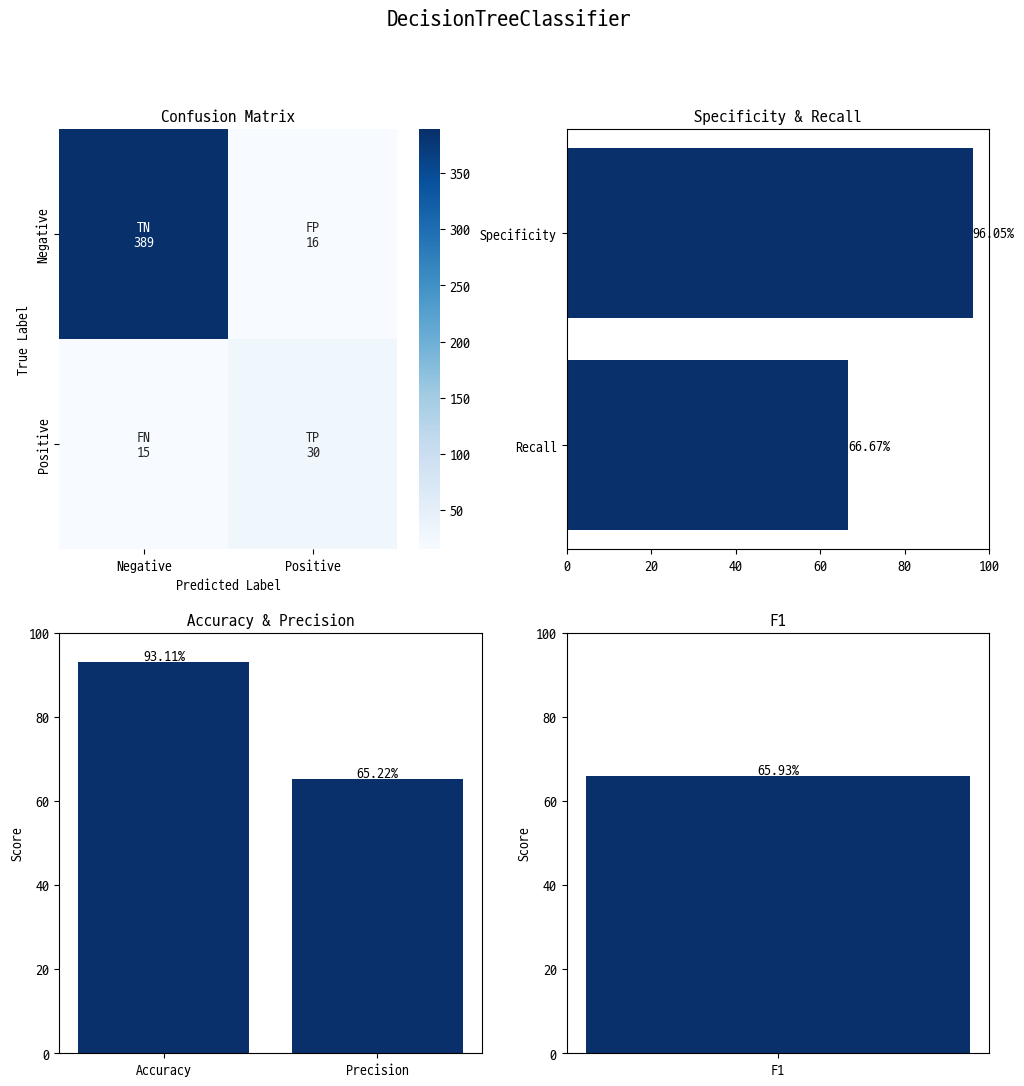

In [42]:
# 모델 평가 dtclf
pred_test = dtclf.predict(X_test)
cm_viz(y_test, pred_test, cmap='Blues', color='#09306B', figsize=(12, 12), title='DecisionTreeClassifier')

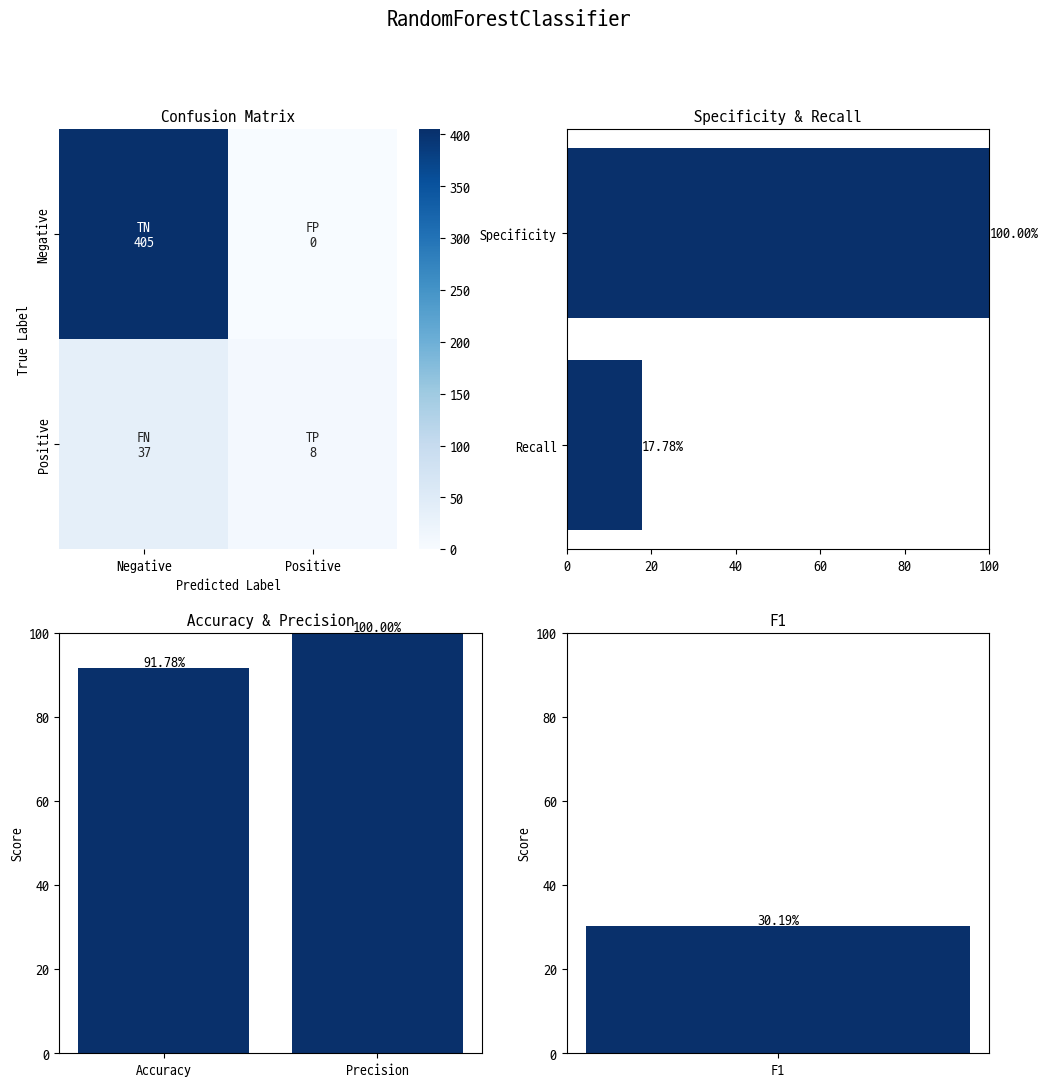

In [43]:
# 모델 평가 rfclf
pred_test = rfclf.predict(X_test)
cm_viz(y_test, pred_test, cmap='Blues', color='#09306B', figsize=(12, 12), title='RandomForestClassifier')

### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [125]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       405
           1       0.65      0.67      0.66        45

    accuracy                           0.93       450
   macro avg       0.81      0.81      0.81       450
weighted avg       0.93      0.93      0.93       450



                                                   데이터의 갯수
                      precision    recall  f1-score   support

                 0       0.96      0.96      0.96       405       # 0이 positive일때 기준
                 1       0.65      0.67      0.66        45       # 1이 positive일때 기준

          accuracy                           0.93       450       # 전체 데이터에서 정확도
         macro avg       0.81      0.81      0.81       450       # macro avg: 각 클래스의 평균
      weighted avg       0.93      0.93      0.93       450       # weighted avg: 각 클래스의 가중 평균

In [126]:
precision_recall_fscore_support(y_test, pred_test)

(array([0.96287129, 0.65217391]),
 array([0.96049383, 0.66666667]),
 array([0.96168109, 0.65934066]),
 array([405,  45], dtype=int64))

## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## Positive(1)일 확률에 대한 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

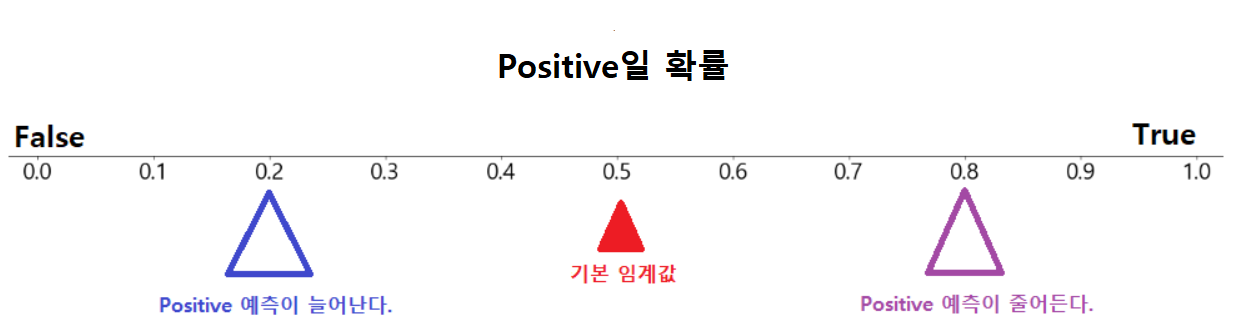

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

### 임계값 변경 후처리를 통한 recall/precision 변경 

##### 모델 예측 결과에 적용

## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- 이진분류의 평가지표. 
- Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율과 정밀도의 변화를 이용해 모델의 성능을 평가한다. 
    - 재현율이 변화할 때 정밀도가 어떻게 변화하는지 평가한다.
- Precision과 Recall 값들을 이용해 모델을 평가하는 것으로 모델의 Positive에 대한 성능의 강건함(robust)를 평가한다.
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
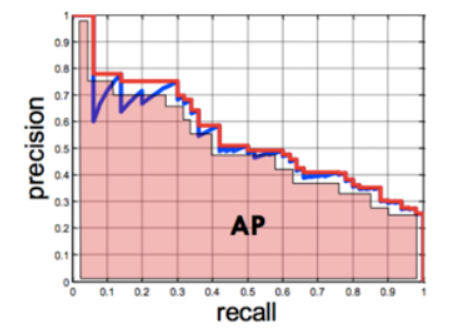   

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    - 낮을 수록 좋다.
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    - 높을 수록 좋다.
    $$
    \frac{TP}{FN+TP}
    $$
- Positive의 임계값을 변경할 경우 **FPR과 TPR(recall)은 비례해서 변화한다.**
- <b style='font-size:1.3em'>ROC Curve</b>
    - 이진 분류의 성능 평가 지표
    - Positive 확률을 이용해 class(0, 1)을 결정할 때 임계값이 변화에 따른 재현율(TPR)과 위양성율(FPR)의 변화를 이용해 모델의 성능을 평가한다.
        - FPR 변화할 때 TPR이 어떻게 변하는 지를 평가한다.
    - FPR을 X축, TPR을 Y축으로 놓고  놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
    - Positive(양성), Negative(음성) 에 대한 모델의 성능의 강건함(robust)을 평가한다.

- **AUC Score**
    - ROC Curve의 결과를 점수화(수치화) 하는 함수로 ROC Curve 아래쪽 면적을 계산한다.
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
        - AUC Score값이 크려면(1에 가까운 값) 임계값이 클 때 FPR은 작고, TPR의 값은 커야 한다. FPR이 작다는 것은 Negative 잘 분류했다는 것이고 TPR이 크다는 것은 Positive를 잘 분류 했다는 의미이므로 둘에 대한 분류성능이 좋다는 것을 의미한다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

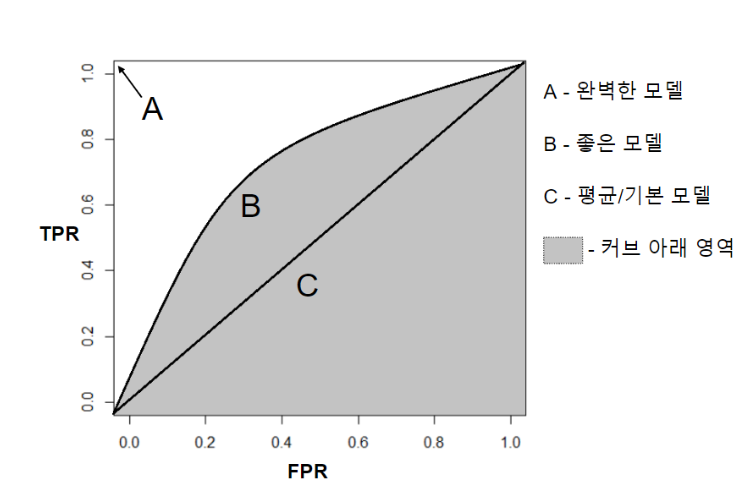

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, Pos_예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, Pos_예측확률) : AUC 점수 반환

## ROC Curve / Precision_Recall Curve
- **ROC Curve/ROC-AUC score**
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- **Precision Recall Curve/AP Score**
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

# 회귀(Regression) 평가지표

예측할 값(Target)이 연속형(continuous) 데이터인 지도 학습(Supervised Learning).

## 회귀의 주요 평가 지표

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - scikit-learn 평가함수: mean_squared_error() 
    - 교차검증시 지정할 문자열: 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    

- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - mean_squared_error() 의 squared=False로 설정해서 계산. 또는 MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.
    - 교차검증시 지정할 문자열: 'neg_root_mean_squared_error'
    
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$
   

- ### $R^2$ (R square, 결정계수)
    - 결정계수는 회귀모델에서 Feature(독립변수)들이 Target(종속변수)를 얼마나 설명하는지를 나타내는 평가지표이다.
        - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값으로 계산한다.
        - 모델은 feature들을 이용해 값을 추론하므로 그 성능은 target에 대한 설명력으로 생각할 수 있다.
    - 1에 가까울 수록 좋은 모델.
    - scikit-learn 평가함수: r2_score()
    - 교차검증시 지정할 문자열: 'r2'
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 정답 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    

## 예제

> #### Dataset 생성 함수
> - make_xxxxx() 함수
>     - 머신러닝 학습을 위한 dummy dataset 구현 함수
>     - 필요한 설정을 직접하여 테스트할 수 있는 데이터셋을 생성해준다.
> - make_regression(): 회귀 문제를 위한 dummy dataset 생성
> - make_classification(): 분류 문제를 위한 dummy dataset 생성

> #### Noise란 
>  같은 Feature를 가진 데이터포인트가 다른 label을 가지는 이유를 Noise(노이즈)라고 한다. 단 그 이유는 현재 상태에선 모른다. 예를 들어 나이란 Feature가 있고 구매량이란 target이 있을때 같은 나이인데 구매량이 다른 경우 그 이유를 우리는 알 수 없다. 그 차이를 만드는 나이 이외의 Feature가 있는데 그것이 수집이 되지 않은 것이다.  그래서 데이터 수집하고 전처리 할 때 그 이유가 되는 Feature를 찾아야 한다. 찾으면 성능이 올라가는 것이고 못찾으면 모르는 이유가 되어 모델 성능이 떨어진다. 

### 데이터셋 생성

### 모델 생성, 학습

### 평가